In [1]:
import torch
import numpy as np
import math
import matplotlib.pyplot as plt


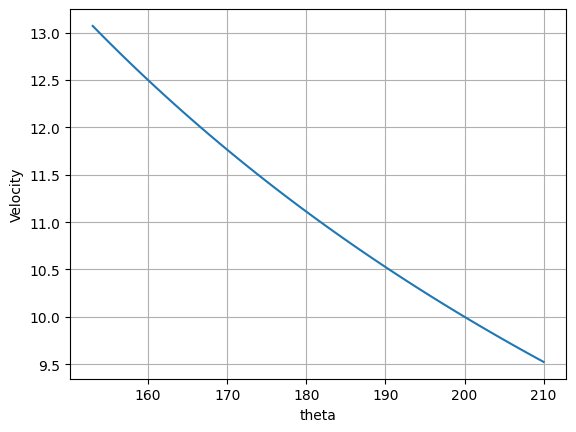

In [421]:
def gold_model():
    theta = np.linspace(153, 210, 204-153)
    ud = [(1/ val) * 1e3 * 2  for val in theta]
    # print(len(ud), len(u))
    
    return ud, theta
ud, theta = gold_model()
plt.grid(True)
plt.ylabel("Velocity")
plt.xlabel("theta")
plt.plot(theta, ud)

In [96]:
ud[0]

13.071895424836601

In [34]:
len(theta)

51

In [302]:
import random 
Ureal = [random.uniform(12.5, 13) for i in range(len(theta))]
# Ureal

In [314]:
data = [[ud[i], abs(ud[i] - Ureal[i]), (ud[i] - Ureal[i])] for i in range(len(theta))]
data

[[13.071895424836601, 0.10907823047363507, 0.10907823047363507],
 [12.975217334890361, 0.0685919513199007, 0.0685919513199007],
 [12.87995878413189, 0.21577208281266458, 0.21577208281266458],
 [12.786088735455825, 0.049242541193368794, -0.049242541193368794],
 [12.693577050012692, 0.24429134709039602, -0.24429134709039602],
 [12.602394454946442, 0.04226671127102577, 0.04226671127102577],
 [12.512512512512512, 0.46974684556855806, -0.46974684556855806],
 [12.42390359050814, 0.25082760556520434, -0.25082760556520434],
 [12.33654083395016, 0.551278620788274, -0.551278620788274],
 [12.250398137939484, 0.3484832025987341, -0.3484832025987341],
 [12.1654501216545, 0.42930792320776234, -0.42930792320776234],
 [12.081672103419113, 0.9094415967554372, -0.9094415967554372],
 [11.999040076793857, 0.5732866758890669, -0.5732866758890669],
 [11.917530687641522, 0.7677903701788509, -0.7677903701788509],
 [11.837121212121213, 0.7203789615282652, -0.7203789615282652],
 [11.757789535567314, 0.955501981

In [315]:
input = torch.randn(3, 5, requires_grad=True)
print(type(input))
# >>> target = torch.randn(3, 5)

<class 'torch.Tensor'>


In [316]:
for i, v in enumerate(data):
    print(torch.tensor(v).reshape(-1, 1))
    break

tensor([[13.0719],
        [ 0.1091],
        [ 0.1091]], dtype=torch.float64)


In [352]:
import torch.optim as optim
import torch.nn as nn
class MultiOutputRegression(torch.nn.Module):

    def __init__(self):
        super(MultiOutputRegression, self).__init__()
        self.linear1 = torch.nn.Linear(1, 32)
        self.linear2 = torch.nn.Linear(32, 32)
        self.linear22 = torch.nn.Linear(32, 32)
        self.linear3 = torch.nn.Linear(32, 3)

    def forward(self, x):
        # print(x.shape)
        x = self.linear1(x)
        # x = nn.BatchNorm1d(10)
        # print(x.shape)
        x = nn.functional.relu(x)
        x = self.linear2(x)
        # x = nn.functional.relu(x)
        # x = self.linear22(x)
        # x = nn.functional.relu(x)
        x = self.linear3(x)
        # x = nn.functional.relu(x)
        log_probs = nn.functional.log_softmax(x, dim=1)
        return log_probs
        # return x
    
def control_law(ki, kp, kd, uexp, ud, inte_prev):
    # uexp, ud = 0, 0
    dt=1
    # print(ki, kp, kd, uexp, ud)
    inte = inte_prev + dt * (uexp -  ud) * 0.5
    ut = kp * uexp + ki * + kd * inte + kd * (1/ dt) * (uexp - ud)
    inte_prev = inte
    return ut, inte_prev

dt = 0.01
inte_prev = 0.0
model  = MultiOutputRegression()
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.01)
x_train = theta
# print(ud[0])
for epoch in range(150):
    inte_prev = 0.0
    for i , v in enumerate(data):
        x_train = torch.tensor(v).reshape(-1, 1).float()
        # print(x_train)
        # ud = torch.tensor(ud[i]).float()
        optimizer.zero_grad()
        y_pred = model(x_train)
        # print(y_pred)
        y = torch.tensor(y_pred, requires_grad=False)
        y_pr = y.detach().numpy() 
        # print(type(y_pr))
        # print(y_pr[y_pr.argmax()])
        # print(type(y_pr[y_pr.argmax()][0]), y_pr[y_pr.argmax()][1], y_pr[y_pr.argmax()][2])
        u, inte_prev = control_law(y_pr[y_pr.argmax()][0], y_pr[y_pr.argmax()][1], y_pr[y_pr.argmax()][2],Ureal[i], ud[i], inte_prev)
        upred = u
        # print(u, ud[i])
        # print(upred, ud[i])
        loss = criterion(torch.tensor([[u, u, u]], requires_grad=True), torch.tensor([[ud[i], ud[i], ud[i]]]))
        loss.backward()
        optimizer.step()
        
        print("current loss: ", loss.detach().numpy())


C:\Users\Asus\AppData\Local\Temp\ipykernel_21152\2731820276.py:53: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  y = torch.tensor(y_pred, requires_grad=False)


current loss:  788.1961272859984
current loss:  787.5966399249343
current loss:  753.5876081471343
current loss:  800.1491322117959
current loss:  826.9488264239541
current loss:  748.6717834368683
current loss:  848.3922322918852
current loss:  773.6785006984852
current loss:  823.4488201591084
current loss:  748.6870531994437
current loss:  746.0989555111524
current loss:  842.2114165800807
current loss:  720.9789504089125
current loss:  740.6465792662385
current loss:  698.386316386977
current loss:  730.5071931159209
current loss:  702.7061888757379
current loss:  658.9580125566214
current loss:  659.503261975445
current loss:  674.4256271443244
current loss:  674.554188153958
current loss:  593.2169703073477
current loss:  708.7483342069671
current loss:  668.1380613609457
current loss:  608.9195781772303
current loss:  672.5107126765282
current loss:  564.437667851499
current loss:  630.8823941221149
current loss:  555.7047265475101
current loss:  449.42122479412177
current loss:

current loss:  746.0989555111524
current loss:  842.2114165800807
current loss:  720.9789504089125
current loss:  740.6465792662385
current loss:  698.386316386977
current loss:  730.5071931159209
current loss:  702.7061888757379
current loss:  658.9580125566214
current loss:  659.503261975445
current loss:  674.4256271443244
current loss:  674.554188153958
current loss:  593.2169703073477
current loss:  708.7483342069671
current loss:  668.1380613609457
current loss:  608.9195781772303
current loss:  672.5107126765282
current loss:  564.437667851499
current loss:  630.8823941221149
current loss:  555.7047265475101
current loss:  449.42122479412177
current loss:  551.2172594388726
current loss:  432.1073673540254
current loss:  386.29141638002335
current loss:  505.6328536828696
current loss:  473.3470533927059
current loss:  323.90164023256096
current loss:  329.3746108397534
current loss:  384.706186160502
current loss:  275.6629952811443
current loss:  365.56306881716205
current los

In [417]:
result = []
pred_model = model(torch.tensor([theta[0], ud[0], (ud[0] - Ureal[0])]).reshape(-1, 1).float())
pred = pred_model.detach().numpy()
pred = pred[pred.argmax()]
upred, inte_prev = control_law(pred[0], pred[1], pred[2], Ureal[0], ud[0], inte_prev)
result.append(upred)
for i in range(len(theta) - 1):
    pred_model = model(torch.tensor([ud[i], abs(ud[i] - Ureal[i]), (ud[i] - Ureal[i])]).reshape(-1, 1).float())
    pred = pred_model.detach().numpy()
    pred = pred[pred.argmax()]
    # print(pred[0], pred[1], pred[2], result[-1], ud[i], inte_prev)
    upred, inte_prev = control_law(pred[0], pred[1], pred[2],Ureal[i], ud[i], inte_prev)
    result.append(upred)

In [418]:
print(result)
# plt.plot(theta, pred)

[29.820957157691232, 29.758690296831638, 29.470573777061873, 30.6076868135603, 28.274048595051514, 26.777772201070757, 29.600984727816222, 25.118284259899514, 27.422977827162516, 24.948323844654887, 27.24579920052265, 26.792949358324968, 22.537453868181196, 26.340001603730567, 24.943272508317406, 25.87663465440901, 23.905189201685463, 24.184034059483658, 25.139174406668552, 24.314939217026826, 22.9194034755835, 22.064538440532363, 24.415168857923, 19.225978545832263, 19.814893336260916, 21.138626500112807, 18.124972050708905, 21.125403870665984, 18.033395185803165, 19.87430679349182, 23.14992674673553, 18.637472955651145, 22.318863318286795, 23.475791541851834, 18.257338857656556, 18.71762221845476, 23.926001481185555, 23.032134771052398, 20.14683188642387, 24.086940317441208, 19.684416771243484, 23.209721898425155, 24.348133192287875, 25.291950722613187, 21.083568503007374, 25.506855638815825, 18.98114415393246, 24.329030562865995, 22.92728829631418, 20.388858796946284, 27.11398828309

In [419]:
len(result)
len(theta)

51

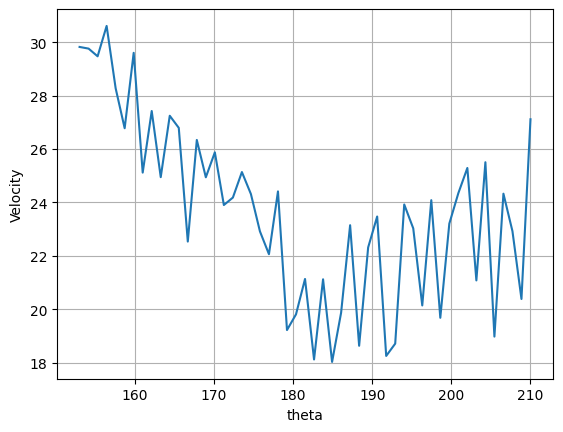

In [420]:
plt.grid(True)
plt.ylabel("Velocity")
plt.xlabel("theta")
plt.plot(theta, result)

In [387]:
import torch.optim as optim
import torch.nn as n
n
class RegNN(torch.nn.Module):

    def __init__(self):
        super(RegNN, self).__init__()
        self.linear1 = torch.nn.Linear(1, 32).to(torch.float32)
        self.linear2 = (torch.nn.Linear(32, 32)).to(torch.float32)
        self.linear3 = torch.nn.Linear(32, 1).to(torch.float32)
        # self.double()

    def forward(self, x):
        # print(x.shape)
        # print(x.dtype)
        # print(self.linear1(x.float()).dtype)
        x = self.linear1(x)
        # x = nn.BatchNorm1d(10)
        # print(x.shape)
        x = nn.functional.relu(x)
        x = self.linear2(x)
        x = nn.functional.relu(x)
        x = self.linear3(x)
        # print(x.shape)
        # log_probs = nn.functional.log_softmax(x, dim=1)
        return x
        # return x
    
# def control_law(ki, kp, kd, uexp, ud, inte_prev):
#     # uexp, ud = 0, 0
#     # print(ki, kp, kd, uexp, ud)
#     inte = inte_prev + dt * (uexp - ud) * 0.5
#     ut = kp * uexp + ki * + kd * inte + kd * (1/ dt) * (uexp - ud)
#     inte_prev = inte
#     return ut, inte_prev

dt = 0.01
inte_prev = 0.0
model_reg  = RegNN()
criterion = nn.MSELoss()
optimizer = optim.SGD(model_reg.parameters(), lr=0.001)
data = [[float(ud[i]), float(abs(ud[i] - Ureal[i])), float(ud[i] - Ureal[i])] for i in range(len(theta))]
# x_train = theta
# print(ud[0])
for epoch in range(100):
    # inte_prev = 0.0
    for i , v in enumerate(data):
        x_train = torch.tensor(v).reshape(-1, 1).to(torch.float32)
        print(v)
        optimizer.zero_grad()
        y = model_reg(x_train)
        y = y[y.argmax()]
        loss = criterion(y.to(torch.float32), torch.tensor([ud[i]]).to(torch.float32))
        loss.backward()
        optimizer.step()
        
        print("current loss: ", loss.detach().numpy())


[13.071895424836601, 0.10907823047363507, 0.10907823047363507]
torch.float32
torch.float32
torch.Size([3, 1])
current loss:  171.47334
[12.975217334890361, 0.0685919513199007, 0.0685919513199007]
torch.float32
torch.float32
torch.Size([3, 1])
current loss:  166.87433
[12.87995878413189, 0.21577208281266458, 0.21577208281266458]
torch.float32
torch.float32
torch.Size([3, 1])
current loss:  162.45093
[12.786088735455825, 0.049242541193368794, -0.049242541193368794]
torch.float32
torch.float32
torch.Size([3, 1])
current loss:  158.07767
[12.693577050012692, 0.24429134709039602, -0.24429134709039602]
torch.float32
torch.float32
torch.Size([3, 1])
current loss:  153.10881
[12.602394454946442, 0.04226671127102577, 0.04226671127102577]
torch.float32
torch.float32
torch.Size([3, 1])
current loss:  149.17207
[12.512512512512512, 0.46974684556855806, -0.46974684556855806]
torch.float32
torch.float32
torch.Size([3, 1])
current loss:  143.13408
[12.42390359050814, 0.25082760556520434, -0.250827605

In [408]:
result = []
pred_model = model_reg(torch.tensor([ud[0], abs(ud[0] - Ureal[0]), (ud[0] - Ureal[0])]).reshape(-1, 1).float())
pred = pred_model.detach().numpy()
pred = pred[pred.argmax()]
# upred, inte_prev = control_law(pred[0], pred[1], pred[2], Ureal[0], ud[0], inte_prev)
result.append(pred)
for i in range(len(theta) - 1):
    pred_model = model_reg(torch.tensor([ud[i], abs(ud[i] - Ureal[i]), (ud[i] - Ureal[i])]).reshape(-1, 1).float())
    pred = pred_model.detach().numpy()
    pred = pred[pred.argmax()]
    # print(pred[0], pred[1], pred[2], result[-1], ud[i], inte_prev)
    # upred, inte_prev = control_law(pred[0], pred[1], pred[2],Ureal[i], ud[i], inte_prev)
    result.append(pred[0])

torch.float32
torch.float32
torch.Size([3, 1])
torch.float32
torch.float32
torch.Size([3, 1])
torch.float32
torch.float32
torch.Size([3, 1])
torch.float32
torch.float32
torch.Size([3, 1])
torch.float32
torch.float32
torch.Size([3, 1])
torch.float32
torch.float32
torch.Size([3, 1])
torch.float32
torch.float32
torch.Size([3, 1])
torch.float32
torch.float32
torch.Size([3, 1])
torch.float32
torch.float32
torch.Size([3, 1])
torch.float32
torch.float32
torch.Size([3, 1])
torch.float32
torch.float32
torch.Size([3, 1])
torch.float32
torch.float32
torch.Size([3, 1])
torch.float32
torch.float32
torch.Size([3, 1])
torch.float32
torch.float32
torch.Size([3, 1])
torch.float32
torch.float32
torch.Size([3, 1])
torch.float32
torch.float32
torch.Size([3, 1])
torch.float32
torch.float32
torch.Size([3, 1])
torch.float32
torch.float32
torch.Size([3, 1])
torch.float32
torch.float32
torch.Size([3, 1])
torch.float32
torch.float32
torch.Size([3, 1])
torch.float32
torch.float32
torch.Size([3, 1])
torch.float32

In [409]:
print(result)

[array([12.710276], dtype=float32), 12.710276, 12.623482, 12.537962, 12.45369, 12.370636, 12.288777, 12.208084, 12.128536, 12.050106, 11.972771, 11.896508, 11.821296, 11.747112, 11.673938, 11.601749, 11.53053, 11.460258, 11.390914, 11.322482, 11.254945, 11.188282, 11.122479, 11.057518, 10.993383, 10.93006, 10.867533, 10.805784, 10.744803, 10.684574, 10.625082, 10.566315, 10.508259, 10.450901, 10.39423, 10.338234, 10.282899, 10.228212, 10.174167, 10.1207485, 10.067946, 10.015752, 9.964149, 9.913137, 9.8626995, 9.812825, 9.76351, 9.714742, 9.666512, 9.618811, 9.5716305]


c:\Users\Asus\AppData\Local\Programs\Python\Python311\Lib\site-packages\numpy\core\shape_base.py:65: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  ary = asanyarray(ary)


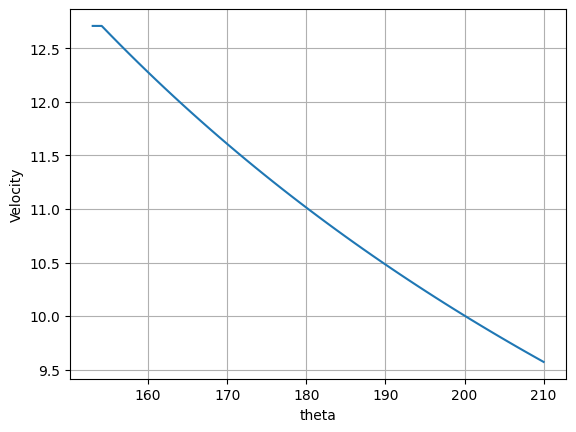

In [411]:
plt.grid(True)
plt.ylabel("Velocity")
plt.xlabel("theta")
plt.plot(theta, result)